In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/creditcard-new.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.124709
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.330389
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [ ]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
original_Xtrain.shape, original_Xtest.shape, original_ytrain.shape, original_ytest.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [ ]:

count_train = original_ytrain.value_counts()[1]
count_test = original_ytest.value_counts()[1]
count_train, count_test
z_stat, p = proportions_ztest(count=[count_train, count_test], nobs=[original_ytrain.shape[0], original_ytest.shape[0]])
print('z-stat = {:5.3f}, p = {:5.3f}'.format(z_stat, p))

z-stat = -1.422, p = 0.155


In [ ]:

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [ ]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
combined_df = pd.concat([fraud_df, non_fraud_df])
new_df = combined_df.sample(frac=1, random_state=42)

In [ ]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
162294,-0.279746,0.356090,-2.715070,-1.759116,1.464335,-0.754490,3.305326,-2.842708,-0.422551,-0.021526,...,0.540362,-0.061283,-1.011455,0.168477,0.048089,0.796566,0.134600,-0.172712,0.086269,1
276546,-0.185426,0.968832,2.077585,-0.171763,-1.484913,0.069503,0.377610,-0.310130,0.048989,-0.107500,...,-0.185222,-0.303819,-0.802401,0.199196,-1.044822,-0.205036,0.241956,-0.079142,-0.079886,1
159968,-0.293440,0.333263,0.025406,0.846902,-0.067211,-0.355127,0.543315,-0.733357,0.817332,-0.062627,...,-0.062186,0.330254,1.110013,-0.200073,0.709867,-0.439706,-0.430222,0.481423,0.288664,1
284435,-0.015371,1.030863,-0.849090,0.898239,0.803991,0.239063,1.055623,-0.705362,1.355428,-0.020894,...,-0.194720,0.106642,0.190689,-0.551375,-0.031931,1.149917,-0.369720,-0.015986,0.029621,1
273333,-0.242157,0.949952,-2.034300,2.705126,-2.011208,-0.203835,-0.437139,-1.560293,-0.225327,1.323647,...,-0.077689,0.409029,1.099018,-0.024881,-0.060328,-0.169751,-0.139378,0.088681,0.138871,1


<Axes: >

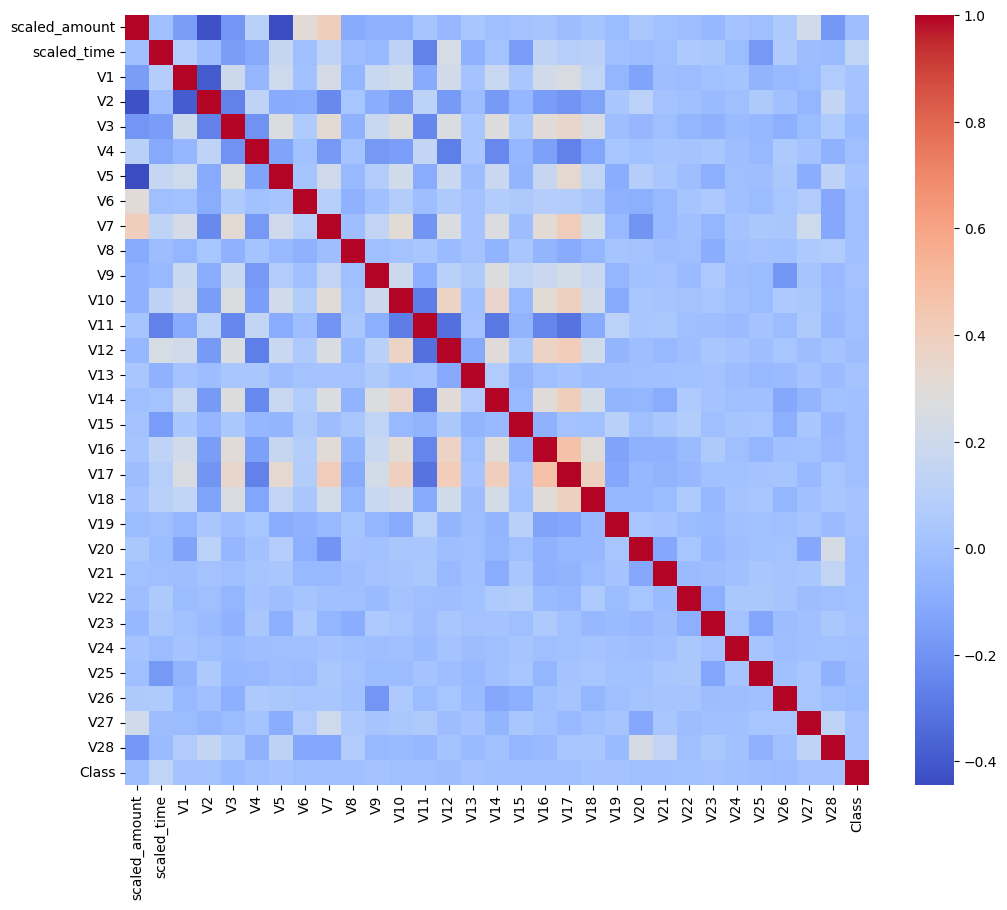

In [ ]:
plt.figure(figsize=(12,10))
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm',xticklabels=1, yticklabels=1)

**Modeling & Evaluation**

In [ ]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']
print(y)

162294    1
276546    1
159968    1
284435    1
273333    1
         ..
125705    1
271940    1
275658    1
163579    1
130286    1
Name: Class, Length: 36010, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28808, 30), (7202, 30), (28808,), (7202,))

In [ ]:
X_train =X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

**LOGISTIC REGRESSION**

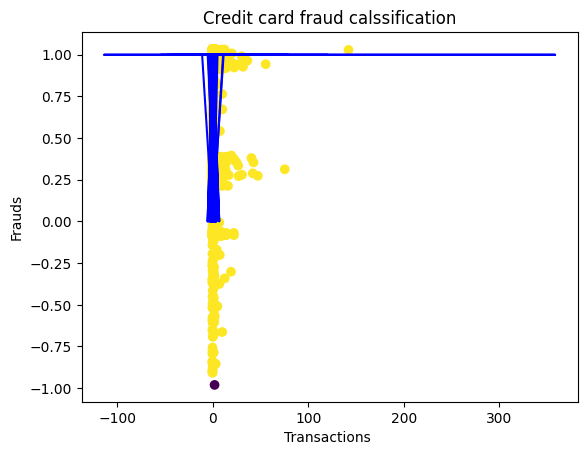

Logistic Regression has a trainning accuracy score of 99.0 %


In [ ]:
# Logistic Regression
LR = LogisticRegression().fit(X_train, y_train)
y_pred=LR.predict(X_test)
x_pred=LR.predict(X_train)
plt.scatter(X_test[:, 0], X_test[:,1], c=y_pred)
plt.plot(X_train,x_pred,color="blue")
plt.xlabel('Transactions ')
plt.ylabel('Frauds')
plt.title('Credit card fraud calssification')
plt.show()
trainning_score_LR = cross_val_score(LR, X_train, y_train, cv=5)
print("Logistic Regression has a trainning accuracy score of", round(trainning_score_LR.mean(), 2) * 100, "%")

In [ ]:
# Logistic Regression fine-tuning
LR_param = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_LR = GridSearchCV(LogisticRegression(), LR_param)
grid_LR.fit(X_train, y_train)
LR_fineTuned = grid_LR.best_estimator_


In [ ]:
# Logistic Regression Prediction
LR_prediction = LR_fineTuned.predict(original_Xtest)
print(classification_report(original_ytest,LR_prediction))
print(confusion_matrix(original_ytest,LR_prediction))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04     49758
           1       0.13      1.00      0.23      7204

    accuracy                           0.15     56962
   macro avg       0.56      0.51      0.14     56962
weighted avg       0.89      0.15      0.07     56962

[[ 1097 48661]
 [    0  7204]]


**KNN**

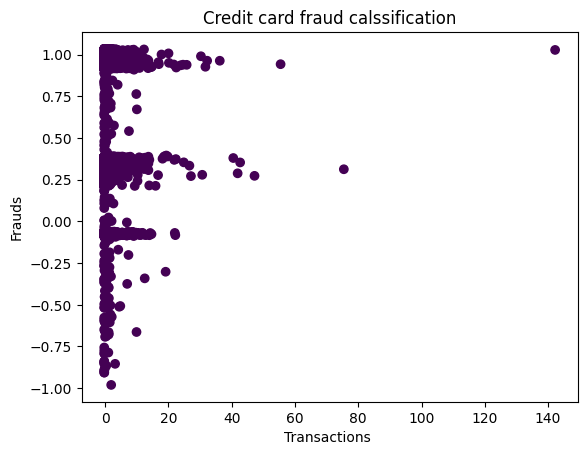

Knn has a training accuracy score of 99.0 %


In [ ]:
# Knn
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred=knn.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:,1], c=y_pred)
plt.xlabel('Transactions ')
plt.ylabel('Frauds')
plt.title('Credit card fraud calssification')
plt.show()
training_score_knn = cross_val_score(knn, X_train, y_train, cv=5)

print("Knn has a training accuracy score of", round(training_score_knn.mean(),2) * 100, "%")

**SVM**

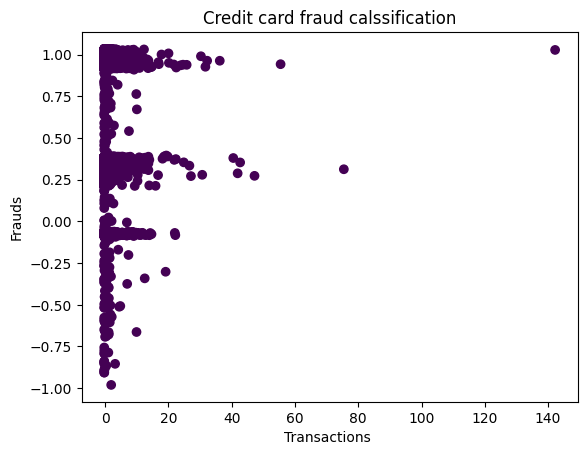

SVM has a training accuracy score of 99.0 %


In [ ]:

# SVM
SVM = SVC().fit(X_train, y_train)
y_pred=SVM.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel('Transactions ')
plt.ylabel('Frauds')
plt.title('Credit card fraud calssification')
plt.show()
training_score_svc = cross_val_score(SVM, X_train, y_train, cv=5)
print("SVM has a training accuracy score of", round(training_score_svc.mean(),2) * 100, "%")

**DECISION TREE**

[Text(0.4492924528301887, 0.9583333333333334, 'x[1] <= -0.086\ngini = 0.027\nsamples = 28808\nvalue = [390, 28418]'), Text(0.19339622641509435, 0.875, 'x[15] <= -1.628\ngini = 0.5\nsamples = 412\nvalue = [203, 209]'), Text(0.07547169811320754, 0.7916666666666666, 'x[13] <= -0.436\ngini = 0.061\nsamples = 192\nvalue = [6, 186]'), Text(0.03773584905660377, 0.7083333333333334, 'x[2] <= 1.178\ngini = 0.011\nsamples = 184\nvalue = [1, 183]'), Text(0.018867924528301886, 0.625, 'gini = 0.0\nsamples = 183\nvalue = [0, 183]'), Text(0.05660377358490566, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.11320754716981132, 0.7083333333333334, 'x[8] <= 0.441\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'), Text(0.09433962264150944, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'), Text(0.1320754716981132, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'), Text(0.3113207547169811, 0.7916666666666666, 'x[15] <= -0.425\ngini = 0.187\nsamples = 220\nvalue = [197, 23]'), Text(0.20754716981132076, 

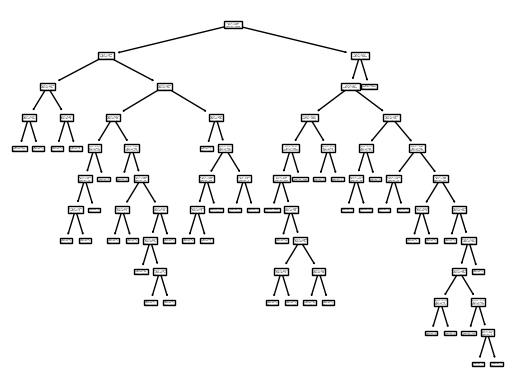

In [ ]:
# DecisionTree
DT = DecisionTreeClassifier().fit(X_train, y_train)
y_pred=DT.predict(X_test)
from sklearn import tree
f=tree.plot_tree(DT)
print(f)
training_score_DT = cross_val_score(DT, X_train, y_train, cv=5)
print("DecisionTree has a training accuracy score of", round(training_score_DT.mean(),2) * 100, "%")

In [ ]:
# DecisionTree fine-tuning
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
DT_fineTuned = grid_tree.best_estimator_

In [ ]:
# DecisionTree Prediction
DT_prediction = DT_fineTuned.predict(original_Xtest)
print(classification_report(original_ytest, DT_prediction))
print(confusion_matrix(original_ytest,DT_prediction))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     49758
           1       0.56      1.00      0.72      7204

    accuracy                           0.90     56962
   macro avg       0.78      0.94      0.83     56962
weighted avg       0.94      0.90      0.91     56962

[[44110  5648]
 [   30  7174]]


**RANDOM FOREST**

In [ ]:
# Random Forest
RF = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
predictions=RF.predict(X_test)
print(predictions)
print(len(predictions))
training_score_RF = cross_val_score(RF, X_train,y_train, cv=5)
print("RandomForest has a training accuracy score of", round(training_score_RF.mean(),2) * 100, "%")

[1 1 1 ... 1 1 1]
7202
RandomForest has a training accuracy score of 99.0 %


**Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9321


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
def classify(num):
  if num<=0:
    return 'The transaction is Fair'
  elif num<=1:
    return 'The transaction is Fraud'

In [ ]:
import gradio as gr
def predict_fraud(V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class):
  input_array=np.array([[V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class]])
  pred=RF.predict(input_array)
  output=classify(pred[0])
  if output=='The transaction is Fair':
    return[(0,output)]
  elif output=='The transaction is Fraud':
    return[(1,output)]

In [ ]:
V1=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V1')
V2=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V2')
V3=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V3')
V4=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V4')
V5=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V5')
V6=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V6')
V7=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V7')
V8=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V8')
V9=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V9')
V10=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V10')
V11=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V11')
V12=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V12')
V13=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V13')
V14=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V14')
V15=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V15')
V16=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V16')
V17=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V17')
V18=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V18')
V19=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V19')
V20=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V20')
V21=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V21')
V22=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V22')
V23=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V23')
V24=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V24')
V25=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V25')
V26=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V26')
V27=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V27')
V28=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='V28')
Amount=gr.inputs.Slider(minimum=0,maximum=1000,default=148,label='Amount of transaction')
Class=gr.inputs.Slider(minimum=0,maximum=1,default=0,label='class')
op=gr.outputs.HighlightedText(color_map={"The transaction is Fair":"green","The transaction is Fraud":"red"})
gr.Interface(predict_fraud,inputs=[V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class],outputs=op,live=True).launch(debug=True)



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>